In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import tree

In [25]:
# Load the dataset
data = pd.read_csv('data2.csv')
# Define the features
features = data[['StartYear', 'EndYear', 'MinAge', 'MaxAge', 'All', 'F', 'M']]
# Bin the 'PercentObese' values into categories
data['ObesityLevel'] = pd.cut(data['PercentObese'], bins=[0, 10, 20, 30, 100], labels=['Not Obese', 'Mildly Obese', 'Moderately Obese', 'Severely Obese'])
# Define the target variable
target = data['ObesityLevel']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


Accuracy: 0.5042016806722689


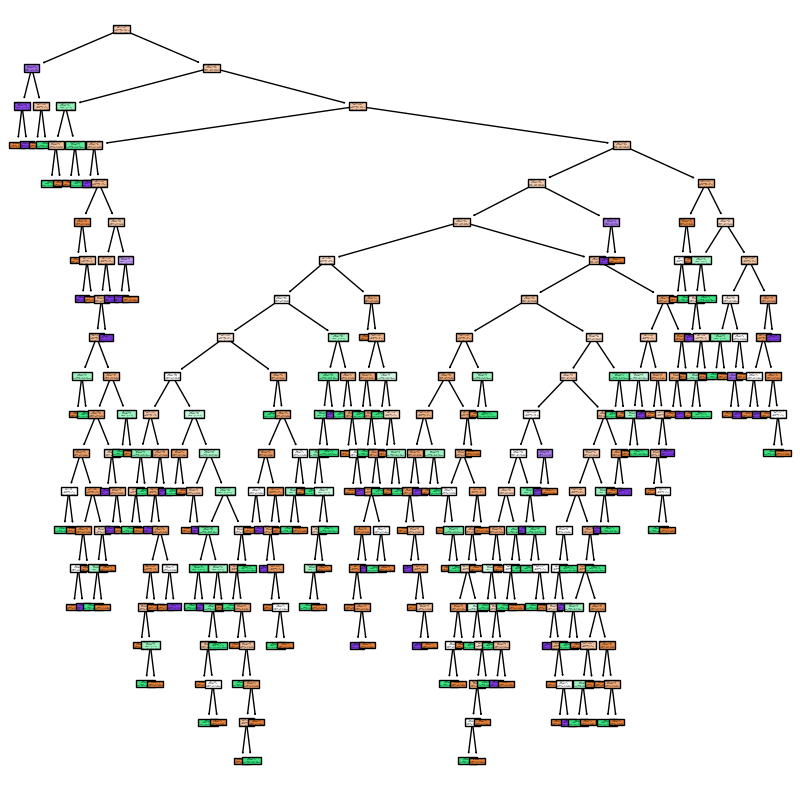

In [26]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()
# Train the classifier
clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test)
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Visualize the decision tree
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_, filled=True, ax=ax)
plt.show()

mean square error
r squared

In [27]:
# Convert categorical predictions and actual target values to numerical labels
label_encoder = LabelEncoder()
y_pred_numerical = label_encoder.fit_transform(y_pred)
y_test_numerical = label_encoder.transform(y_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test_numerical, y_pred_numerical)
print("Mean Squared Error:", mse)

# Calculate the R-squared score
r2 = r2_score(y_test_numerical, y_pred_numerical)
print("R-squared:", r2)

Mean Squared Error: 0.9243697478991597
R-squared: -0.6277045511066897


In [28]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Create a DataFrame to store the predictions
predictions = pd.DataFrame({'Prediction': y_pred})

# Save the predictions to a CSV file
predictions.to_csv('predictions.csv', index=False)

